# Heart Attack Prediction

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("heart_attack_indonesia.csv")

In [3]:
data.head(10)

,ID,State,Age,HeartAttack,Gender,Cholesterol,SmokingHabits,PhysicalActivity,BMI,Hypertension,Diabetes,AlcoholConsumption,DietType,OccupationType,StressLevel,EducationLevel,MaritalStatus,FamilyHistoryHeartDisease,IncomeLevel,HealthcareAccess,SleepHours,UrbanOrRural,AirQualityIndex,PollutionLevel,EmploymentStatus
0,1,Pekanbaru,32,No,Male,179,Smoker,High,19.1,Yes,No,NaN,Unhealthy,Active,Moderate,Secondary,Single,No,Middle,Good,7.9,Urban,73,High,Unemployed
1,2,Makassar,15,Yes,Female,201,Non-smoker,High,26.9,No,Yes,Rarely,Balanced,Sedentary,Moderate,Secondary,Married,No,Middle,Average,8.5,Urban,266,Moderate,Unemployed
2,3,Surabaya,41,No,Female,167,Non-smoker,Moderate,29.6,Yes,No,NaN,Balanced,Active,Low,Primary,Single,No,Middle,Poor,7.3,Urban,132,Moderate,Employed
3,4,Malang,31,No,Male,287,Smoker,Moderate,19.4,No,No,Rarely,Unhealthy,Sedentary,Low,Higher,Single,Yes,Middle,Good,4.8,Rural,64,High,Unemployed
4,5,Bali,19,No,Male,239,Smoker,High,18.5,No,No,NaN,Balanced,Active,Low,Secondary,Married,No,Low,Poor,6.0,Urban,155,Moderate,Unemployed
5,6,Bali,34,No,Female,195,Non-smoker,Moderate,22.8,Yes,No,Rarely,Balanced,Active,Moderate,Higher,Single,No,Low,Poor,5.6,Rural,53,Low,Employed
6,7,Surabaya,24,No,Male,193,Smoker,Moderate,21.7,No,Yes,Often,Unhealthy,Sedentary,Moderate,Secondary,Single,No,Low,Poor,6.0,Rural,281,Moderate,Unemployed
7,8,Bandung,60,No,Female,170,Smoker,High,25.4,Yes,No,Rarely,Unhealthy,Active,High,Secondary,Single,No,Middle,Poor,6.1,Rural,184,High,Employed
8,9,Pekanbaru,22,No,Female,204,Non-smoker,High,26.3,Yes,No,Rarely,Balanced,Sedentary,High,Higher,Single,Yes,High,Good,8.0,Urban,111,Low,Unemployed
9,10,Denpasar,40,Yes,Male,163,Non-smoker,Moderate,19.1,No,No,NaN,Balanced,Active,Moderate,Secondary,Married,No,Low,Poor,7.7,Urban,57,Moderate,Unemployed


In [4]:
data.isnull().sum()

ID                               0
State                            0
Age                              0
HeartAttack                      0
Gender                           0
Cholesterol                      0
SmokingHabits                    0
PhysicalActivity                 0
BMI                              0
Hypertension                     0
Diabetes                         0
AlcoholConsumption           56628
DietType                         0
OccupationType                   0
StressLevel                      0
EducationLevel                   0
MaritalStatus                    0
FamilyHistoryHeartDisease        0
IncomeLevel                      0
HealthcareAccess                 0
SleepHours                       0
UrbanOrRural                     0
AirQualityIndex                  0
PollutionLevel                   0
EmploymentStatus                 0
dtype: int64

In [9]:
data['AlcoholConsumption'].unique()

array([nan, 'Rarely', 'Often'], dtype=object)

In [10]:
data.fillna({'AlcoholConsumption':'No'},inplace=True)

In [11]:
data.head(10)

,ID,State,Age,HeartAttack,Gender,Cholesterol,SmokingHabits,PhysicalActivity,BMI,Hypertension,Diabetes,AlcoholConsumption,DietType,OccupationType,StressLevel,EducationLevel,MaritalStatus,FamilyHistoryHeartDisease,IncomeLevel,HealthcareAccess,SleepHours,UrbanOrRural,AirQualityIndex,PollutionLevel,EmploymentStatus
0,1,Pekanbaru,32,No,Male,179,Smoker,High,19.1,Yes,No,No,Unhealthy,Active,Moderate,Secondary,Single,No,Middle,Good,7.9,Urban,73,High,Unemployed
1,2,Makassar,15,Yes,Female,201,Non-smoker,High,26.9,No,Yes,Rarely,Balanced,Sedentary,Moderate,Secondary,Married,No,Middle,Average,8.5,Urban,266,Moderate,Unemployed
2,3,Surabaya,41,No,Female,167,Non-smoker,Moderate,29.6,Yes,No,No,Balanced,Active,Low,Primary,Single,No,Middle,Poor,7.3,Urban,132,Moderate,Employed
3,4,Malang,31,No,Male,287,Smoker,Moderate,19.4,No,No,Rarely,Unhealthy,Sedentary,Low,Higher,Single,Yes,Middle,Good,4.8,Rural,64,High,Unemployed
4,5,Bali,19,No,Male,239,Smoker,High,18.5,No,No,No,Balanced,Active,Low,Secondary,Married,No,Low,Poor,6.0,Urban,155,Moderate,Unemployed
5,6,Bali,34,No,Female,195,Non-smoker,Moderate,22.8,Yes,No,Rarely,Balanced,Active,Moderate,Higher,Single,No,Low,Poor,5.6,Rural,53,Low,Employed
6,7,Surabaya,24,No,Male,193,Smoker,Moderate,21.7,No,Yes,Often,Unhealthy,Sedentary,Moderate,Secondary,Single,No,Low,Poor,6.0,Rural,281,Moderate,Unemployed
7,8,Bandung,60,No,Female,170,Smoker,High,25.4,Yes,No,Rarely,Unhealthy,Active,High,Secondary,Single,No,Middle,Poor,6.1,Rural,184,High,Employed
8,9,Pekanbaru,22,No,Female,204,Non-smoker,High,26.3,Yes,No,Rarely,Balanced,Sedentary,High,Higher,Single,Yes,High,Good,8.0,Urban,111,Low,Unemployed
9,10,Denpasar,40,Yes,Male,163,Non-smoker,Moderate,19.1,No,No,No,Balanced,Active,Moderate,Secondary,Married,No,Low,Poor,7.7,Urban,57,Moderate,Unemployed


In [12]:
data.describe()

,ID,Age,Cholesterol,BMI,SleepHours,AirQualityIndex
count,170501.000000,170501.000000,170501.000000,170501.000000,170501.000000,170501.000000
mean,85251.000000,39.510132,224.525035,26.511188,6.503479,174.802541
std,49219.543461,14.416183,43.230770,4.902923,1.442710,72.150478
min,1.000000,15.000000,150.000000,18.000000,4.000000,50.000000
25%,42626.000000,27.000000,187.000000,22.300000,5.300000,112.000000
50%,85251.000000,40.000000,225.000000,26.500000,6.500000,175.000000
75%,127876.000000,52.000000,262.000000,30.800000,7.800000,237.000000
max,170501.000000,64.000000,299.000000,35.000000,9.000000,299.000000


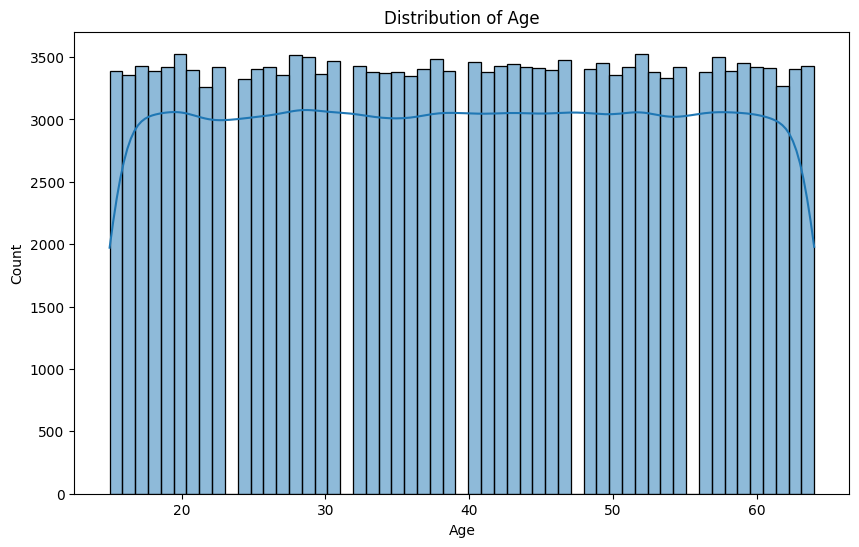

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data['Age'],kde=True)
plt.title('Distribution of Age')
plt.show()

In [15]:
target = 'HeartAttack'
X = data.drop(columns=[target, 'ID', 'State'])  # Dropping non-predictive columns
y = data[target]

In [18]:
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [19]:
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(y)

In [20]:
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X[numerical_columns] = scaler.fit_transform(X[numerical_columns])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12, stratify=y)

In [41]:
model = RandomForestClassifier(random_state=12, n_estimators=1000)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=12)

In [42]:
y_pred = model.predict(X_test)

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7497018631111806


In [44]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86     38348
           1       0.00      0.00      0.00     12803

    accuracy                           0.75     51151
   macro avg       0.37      0.50      0.43     51151
weighted avg       0.56      0.75      0.64     51151



C:\Users\nijaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nijaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nijaa\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

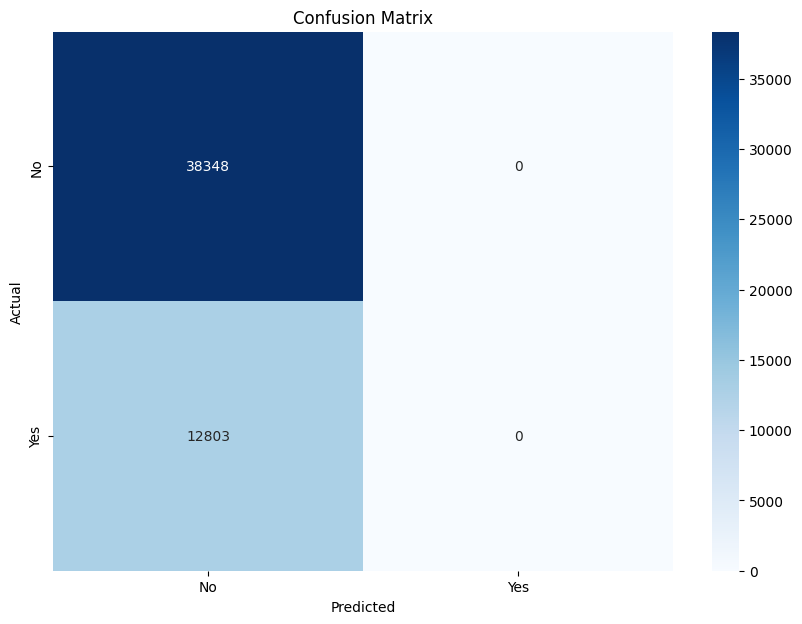

In [45]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()